# Histogram

In [19]:
import cv2, math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [348]:
te_img = cv2.imread('./gray_mist_7711.jpg')
te_img = cv2.cvtColor(te_img, cv2.COLOR_BGR2GRAY)

In [302]:
def make_histogram(img):
    L = img.max()
    M = img.shape[0]
    N = img.shape[1]
    hist = []
    hist_hat = []
    for ldx in range(L+2):
        hist.append((img==ldx).sum())
        hist_hat.append((img==ldx).sum()/(M*N))
        
    return hist, hist_hat

In [352]:
hist, hist_hat = make_histogram(te_img)


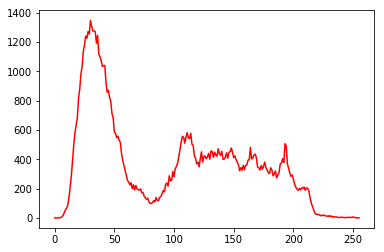

In [356]:
plt.plot(hist, 'r')

In [358]:
def make_histogram_eq(img):
    tmp_img = np.zeros_like(img)
    L = img.max()+2
    hist, hist_hat = make_histogram(img)
    c = []
    t = []
    c_i = 0
    for i in hist_hat:
        c_i += i
        c.append(c_i)
        t.append(round(c_i*(L-1)))
    for pdx, pix in enumerate(t):
        tmp_img += (img==pdx)*np.uint8(pix)
    return hist, c, t, tmp_img

In [359]:
x, y, z, out = make_histogram_eq(te_img)

In [360]:
eq_hist = make_histogram(out)

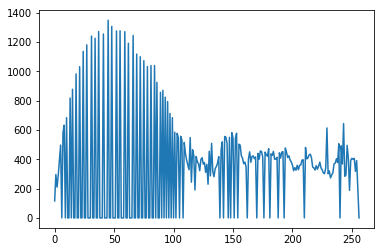

In [361]:
plt.plot(eq_hist[0])